<a href="https://colab.research.google.com/github/sshcecilia/groceries_collaborative_filtering/blob/main/Collaborative_Filtering_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive2
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# Load Data

In [ ]:
files = [
    ['aisles.csv', 'https://drive.google.com/file/d/1o4IG9y5C_pxi-pY5FcSqdTdSU2B5F9UJ/view?usp=drive_link']
    , ['departments.csv', 'https://drive.google.com/file/d/1stMu6xE4w0-9Z60VO2jeU3J8L26MoPt4/view?usp=drive_link']
    , ['order_products__prior.csv', 'https://drive.google.com/file/d/1XL5O-hgwjFq8j0UVbp28R7P3bmVeKieQ/view?usp=drive_link']
    , ['order_products__train.csv', 'https://drive.google.com/file/d/1Ux-mH_t5LCnbpiTXld3lJmVKQrAyxe-J/view?usp=drive_link']
    , ['orders.csv', 'https://drive.google.com/file/d/12-Imqn-f7qnjRKbYCHWwK1LuSvX2c9cf/view?usp=drive_link']
    , ['products.csv', 'https://drive.google.com/file/d/1zfEVroXVByALZka7tEghJBo1QLMHZcQk/view?usp=drive_link']
    , ['users_productname_mix_df_prior_1.csv', 'https://drive.google.com/file/d/1-7j_W48lTqLpelnGi6hgAEO0_prz46nQ/view?usp=drive_link']
    , ['users_productname_mix_df_prior_2.csv', 'https://drive.google.com/file/d/1w9lWFllzAoz6a7W9FrOpQfWHsZluCkXk/view?usp=drive_link']
    , ['users_productname_mix_df_prior_3.csv', 'https://drive.google.com/file/d/1EHIBqbrefd9IqUBCmV8iY1nJcoVv81OD/view?usp=drive_link']
    , ['users_productname_mix_df_prior_4.csv', 'https://drive.google.com/file/d/19pDwwSHsbaDkTMb7egv1VPOlnpDPZRXV/view?usp=drive_link']
    , ['users_productname_mix_df_prior_5.csv', 'https://drive.google.com/file/d/1PAm-m29Pv34gNEUNAGmMznh8qD_xHdF4/view?usp=drive_link']
    , ['user_mix_cluster.csv', 'https://drive.google.com/file/d/1-3hVZ3deNBbtjElkMz2BhAQPOjaCR7F1/view?usp=sharing']
    , ['user_timecat_mix_cluster.csv', 'https://drive.google.com/file/d/1-4hU9c7_7iq2k1TmYfM6k43didwiC0B3/view?usp=drive_link']
    , ['user_tow_deptname_mix_pivot_cluster.csv', 'https://drive.google.com/file/d/1-IjVrlF4WjdFvztclVQIonqIIHZQ00Fa/view?usp=sharing']
]

In [ ]:
for i in files:
    link = i[1]
    fluff, id = link.split('/d/')
    id, fluff = id.split('/')
    print (id) # Verify that you have everything after '='
    downloaded = drive.CreateFile({'id':id})
    downloaded.GetContentFile(i[0])

1o4IG9y5C_pxi-pY5FcSqdTdSU2B5F9UJ
1stMu6xE4w0-9Z60VO2jeU3J8L26MoPt4
1XL5O-hgwjFq8j0UVbp28R7P3bmVeKieQ
1Ux-mH_t5LCnbpiTXld3lJmVKQrAyxe-J
12-Imqn-f7qnjRKbYCHWwK1LuSvX2c9cf
1zfEVroXVByALZka7tEghJBo1QLMHZcQk
1-7j_W48lTqLpelnGi6hgAEO0_prz46nQ
1w9lWFllzAoz6a7W9FrOpQfWHsZluCkXk
1EHIBqbrefd9IqUBCmV8iY1nJcoVv81OD
19pDwwSHsbaDkTMb7egv1VPOlnpDPZRXV
1PAm-m29Pv34gNEUNAGmMznh8qD_xHdF4
1-3hVZ3deNBbtjElkMz2BhAQPOjaCR7F1
1-4hU9c7_7iq2k1TmYfM6k43didwiC0B3
1-IjVrlF4WjdFvztclVQIonqIIHZQ00Fa


# Preparing Data in the Required Format

## Installing PySpark

In [ ]:
!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.
!pip install pyspark

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

import findspark
findspark.init()

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

conf = SparkConf().setAppName("Clustering")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)
spark

## Read Data into RDD

In [ ]:
aisles_rdd = spark.read.csv('aisles.csv', header=True).rdd
departments_rdd = spark.read.csv('departments.csv', header=True).rdd
order_products_prior_rdd = spark.read.csv('order_products__prior.csv', header=True).rdd
order_products_train_rdd = spark.read.csv('order_products__train.csv', header=True).rdd
orders_rdd = spark.read.csv('orders.csv', header=True).rdd
products_rdd = spark.read.csv('products.csv', header=True).rdd

Products table needs to read into pandas dataframe before converting to RDD as one of the product name has ',' in it, resulting in wrong values extracted for aisle_id and department_id when read directly into RDD.

In [ ]:
products = pd.read_csv('products.csv')
productsDF = spark.createDataFrame(products)
products_rdd = productsDF.rdd

In [ ]:
aisles_rdd.take(5)

[Row(aisle_id='1', aisle='prepared soups salads'),
 Row(aisle_id='2', aisle='specialty cheeses'),
 Row(aisle_id='3', aisle='energy granola bars'),
 Row(aisle_id='4', aisle='instant foods'),
 Row(aisle_id='5', aisle='marinades meat preparation')]

In [ ]:
departments_rdd.take(5)

[Row(department_id='1', department='frozen'),
 Row(department_id='2', department='other'),
 Row(department_id='3', department='bakery'),
 Row(department_id='4', department='produce'),
 Row(department_id='5', department='alcohol')]

In [ ]:
order_products_prior_rdd.take(5)

[Row(order_id='2', product_id='33120', add_to_cart_order='1', reordered='1'),
 Row(order_id='2', product_id='28985', add_to_cart_order='2', reordered='1'),
 Row(order_id='2', product_id='9327', add_to_cart_order='3', reordered='0'),
 Row(order_id='2', product_id='45918', add_to_cart_order='4', reordered='1'),
 Row(order_id='2', product_id='30035', add_to_cart_order='5', reordered='0')]

In [ ]:
print(order_products_prior_rdd.getNumPartitions())
order_products_prior_rdd = order_products_prior_rdd.repartition(16)

5


In [ ]:
order_products_train_rdd.take(5)

[Row(order_id='1', product_id='49302', add_to_cart_order='1', reordered='1'),
 Row(order_id='1', product_id='11109', add_to_cart_order='2', reordered='1'),
 Row(order_id='1', product_id='10246', add_to_cart_order='3', reordered='0'),
 Row(order_id='1', product_id='49683', add_to_cart_order='4', reordered='0'),
 Row(order_id='1', product_id='43633', add_to_cart_order='5', reordered='1')]

In [ ]:
print(order_products_train_rdd.getNumPartitions())
order_products_train_rdd = order_products_train_rdd.repartition(16)

2


In [ ]:
orders_rdd.take(5)

[Row(order_id='2539329', user_id='1', eval_set='prior', order_number='1', order_dow='2', order_hour_of_day='08', days_since_prior_order=None),
 Row(order_id='2398795', user_id='1', eval_set='prior', order_number='2', order_dow='3', order_hour_of_day='07', days_since_prior_order='15.0'),
 Row(order_id='473747', user_id='1', eval_set='prior', order_number='3', order_dow='3', order_hour_of_day='12', days_since_prior_order='21.0'),
 Row(order_id='2254736', user_id='1', eval_set='prior', order_number='4', order_dow='4', order_hour_of_day='07', days_since_prior_order='29.0'),
 Row(order_id='431534', user_id='1', eval_set='prior', order_number='5', order_dow='4', order_hour_of_day='15', days_since_prior_order='28.0')]

In [ ]:
products_rdd.take(5)

[Row(product_id=1, product_name='Chocolate Sandwich Cookies', aisle_id=61, department_id=19),
 Row(product_id=2, product_name='All-Seasons Salt', aisle_id=104, department_id=13),
 Row(product_id=3, product_name='Robust Golden Unsweetened Oolong Tea', aisle_id=94, department_id=7),
 Row(product_id=4, product_name='Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce', aisle_id=38, department_id=1),
 Row(product_id=5, product_name='Green Chile Anytime Sauce', aisle_id=5, department_id=13)]

In [ ]:
orders_prior_rdd = orders_rdd.filter(lambda x: x['eval_set'] == 'prior')
orders_prior_rdd.take(5)

[Row(order_id='2539329', user_id='1', eval_set='prior', order_number='1', order_dow='2', order_hour_of_day='08', days_since_prior_order=None),
 Row(order_id='2398795', user_id='1', eval_set='prior', order_number='2', order_dow='3', order_hour_of_day='07', days_since_prior_order='15.0'),
 Row(order_id='473747', user_id='1', eval_set='prior', order_number='3', order_dow='3', order_hour_of_day='12', days_since_prior_order='21.0'),
 Row(order_id='2254736', user_id='1', eval_set='prior', order_number='4', order_dow='4', order_hour_of_day='07', days_since_prior_order='29.0'),
 Row(order_id='431534', user_id='1', eval_set='prior', order_number='5', order_dow='4', order_hour_of_day='15', days_since_prior_order='28.0')]

In [ ]:
orders_train_rdd = orders_rdd.filter(lambda x: x['eval_set'] == 'train')
orders_train_rdd.take(5)

[Row(order_id='1187899', user_id='1', eval_set='train', order_number='11', order_dow='4', order_hour_of_day='08', days_since_prior_order='14.0'),
 Row(order_id='1492625', user_id='2', eval_set='train', order_number='15', order_dow='1', order_hour_of_day='11', days_since_prior_order='30.0'),
 Row(order_id='2196797', user_id='5', eval_set='train', order_number='5', order_dow='0', order_hour_of_day='11', days_since_prior_order='6.0'),
 Row(order_id='525192', user_id='7', eval_set='train', order_number='21', order_dow='2', order_hour_of_day='11', days_since_prior_order='6.0'),
 Row(order_id='880375', user_id='8', eval_set='train', order_number='4', order_dow='1', order_hour_of_day='14', days_since_prior_order='10.0')]

## Preparing Data for Collaborative Filtering

In [ ]:
order_products_users = order_products_prior_rdd.map(lambda x: (x['order_id'], x['product_id'])).join(orders_prior_rdd.map(lambda x: (x['order_id'], x['user_id'])))
order_products_users.take(5)

[('106', ('4210', '161214')),
 ('106', ('11210', '161214')),
 ('106', ('2839', '161214')),
 ('106', ('19836', '161214')),
 ('106', ('49505', '161214'))]

In [ ]:
users_products_qty = order_products_users.map(lambda x: ((x[1][1], x[1][0]), (1))).reduceByKey(lambda x,y: x+y)
users_products_qty.take(5)

[(('188517', '25890'), 18),
 (('108181', '8733'), 8),
 (('95262', '48171'), 2),
 (('63160', '19794'), 1),
 (('165076', '41290'), 42)]

In [ ]:
users_products_ttlqty = users_products_qty.map(lambda x: (x[0][0], x[1])).reduceByKey(lambda x,y: x+y)
users_products_ttlqty.take(5)

[('183139', 540),
 ('68215', 338),
 ('21944', 1142),
 ('110549', 250),
 ('127991', 335)]

In [ ]:
users_products_mix = users_products_qty.map(lambda x: (x[0][0], (x[0][1], x[1]))).join(users_products_ttlqty)
users_products_mix.take(5)

[('21944', (('39190', 7), 1142)),
 ('21944', (('39332', 19), 1142)),
 ('21944', (('42828', 9), 1142)),
 ('21944', (('47209', 25), 1142)),
 ('21944', (('19006', 6), 1142))]

In [ ]:
users_products_mix = users_products_qty.map(lambda x: (x[0][0], (x[0][1], x[1]))).join(users_products_ttlqty)
users_products_mix = users_products_mix.map(lambda x: (int(x[1][0][0]), (x[0], x[1][0][1]/x[1][1]))).join(products_rdd.map(lambda x: (x['product_id'], x['product_name'])))
users_products_mix.take(5)

[(47766, (('21944', 0.0008756567425569177), 'Organic Avocado')),
 (47766, (('33730', 0.006535947712418301), 'Organic Avocado')),
 (47766, (('47849', 0.004158004158004158), 'Organic Avocado')),
 (47766, (('1531', 0.0081799591002045), 'Organic Avocado')),
 (47766, (('60939', 0.012276785714285714), 'Organic Avocado'))]

In [ ]:
users_productname_mix = users_products_mix.map(lambda x: (x[1][0][0], x[0], x[1][1], x[1][0][1]))
users_productname_mix.take(5)

[('21944', 47766, 'Organic Avocado', 0.0008756567425569177),
 ('33730', 47766, 'Organic Avocado', 0.006535947712418301),
 ('47849', 47766, 'Organic Avocado', 0.004158004158004158),
 ('1531', 47766, 'Organic Avocado', 0.0081799591002045),
 ('60939', 47766, 'Organic Avocado', 0.012276785714285714)]

## Save the Files in Chunks

In [ ]:
item_num = users_productname_mix.map(lambda x: x[1]).distinct().collect()

In [ ]:
def chunks(chunk, n):
    for i in range(0, len(chunk), n):
        yield chunk[i:i + n]

In [ ]:
j = 1
for i in chunks(item_num, 10000):
    print(j)
    data_rdd = users_productname_mix.filter(lambda x: x[1] in i)
    data_df = data_rdd.toDF().toPandas()
    data_df = data_df.rename(columns={'_1': 'user_id', '_2': 'product_id', '_3':'product', '_4':'mix'})
    data_df.to_csv('users_productname_mix_df_prior_' + str(j) + '.csv', index = False)
    j += 1

1
2
3
4
5


# User Based Collaborative Filtering

In [ ]:
users_productname_mix_df = pd.read_csv('users_productname_mix_df_prior_1.csv')

for i in range(4):
    print('users_productname_mix_df_prior_' + str(i+2) + '.csv')
    df = pd.read_csv('users_productname_mix_df_prior_' + str(i+2) + '.csv')
    users_productname_mix_df = users_productname_mix_df.append(df, ignore_index=True)

users_productname_mix_df_prior_2.csv
users_productname_mix_df_prior_3.csv
users_productname_mix_df_prior_4.csv
users_productname_mix_df_prior_5.csv


In [ ]:
users_productname_mix_df.head()

,user_id,product_id,product,mix
0,21944,47766,Organic Avocado,0.000876
1,33730,47766,Organic Avocado,0.006536
2,47849,47766,Organic Avocado,0.004158
3,1531,47766,Organic Avocado,0.008180
4,60939,47766,Organic Avocado,0.012277


## Utilize the Clustering Results to Perform User Based Collaborative Filtering

In [ ]:
user_tow_deptname_mix_pivot_cluster = pd.read_csv('user_tow_deptname_mix_pivot_cluster.csv')
cluster = user_tow_deptname_mix_pivot_cluster[['user_id', 'cluster_kmeans']]

In [ ]:
users_productname_mix_df = users_productname_mix_df.set_index('user_id').join(cluster.set_index('user_id'))
users_productname_mix_df.reset_index(drop = False, inplace = True)
users_productname_mix_df.head()

,user_id,product_id,product,mix,cluster_kmeans
0,1,12427,Original Beef Jerky,0.169492,6
1,1,35951,Organic Unsweetened Almond Milk,0.016949,6
2,1,196,Soda,0.169492,6
3,1,30450,Creamy Almond Butter,0.016949,6
4,1,25133,Organic String Cheese,0.135593,6


In [ ]:
import random

random.seed(0)
s = list(range(users_productname_mix_df.shape[0]))
random.shuffle(s)

test_sample = s[-int(users_productname_mix_df.shape[0] * 0.2):]

In [ ]:
users_productname_mix_df_train = users_productname_mix_df.drop(test_sample, axis = 0)
users_productname_mix_df_test = users_productname_mix_df.iloc[test_sample]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def top_similar_user(mat, user_map, n_neighbours):
    num_users = mat.shape[0]
    similar_users = []
    similarity_score = []
    user_lst = []
    index_lst = []

    for i in range(num_users):
        similarity = cosine_similarity(mat[i:i+1], mat)[0]
        top_indices = np.argsort(-similarity)[1:n_neighbours+1]
        user_lst.append(user_map.loc[i, 'user_id'])
        similar_users.append(user_map.loc[top_indices, 'user_id'].values)
        similarity_score.append(similarity[top_indices])
        index_lst.append(top_indices)
        del top_indices, similarity

    return user_lst, similar_users, similarity_score, index_lst

In [ ]:
from scipy.sparse import csr_matrix
from tqdm import tqdm

num_sim_users = 10
num_product_pred = 5
results = pd.DataFrame(columns = ['user_id', 'product_id', 'prediction'])

for i in users_productname_mix_df_train['cluster_kmeans'].unique():
    print('Get Similar Users for Cluster: ', i)
    subset_df = users_productname_mix_df_train[users_productname_mix_df_train['cluster_kmeans'] == i]

    user = list(sorted(subset_df.user_id.unique()))
    item = list(sorted(subset_df.product_id.unique()))

    data = subset_df['mix'].tolist()

    row = subset_df.user_id.astype('category').cat.codes
    col = subset_df.product_id.astype('category').cat.codes
    users_productname_mix_matrix = csr_matrix((data, (row, col)), shape=(len(user), len(item)))

    user_mapping = pd.concat([subset_df.user_id, row], axis = 1)
    user_mapping.rename(columns = {0: 'index'}, inplace = True)
    user_mapping.drop_duplicates(inplace = True)
    user_mapping.set_index('index', inplace = True)

    item_mapping = pd.concat([subset_df.product_id, col], axis = 1)
    item_mapping.rename(columns = {0: 'index'}, inplace = True)
    item_mapping.drop_duplicates(inplace = True)
    item_mapping.set_index('index', inplace = True)

    user_list, sim_user, sim_score, index_list = top_similar_user(users_productname_mix_matrix, user_mapping, num_sim_users)

    print('Get Product for Cluster: ', i)
    for j in tqdm(range(len(index_list))):
        if sum(sim_score[j]) != 0:
            avg = pd.DataFrame(np.average(users_productname_mix_matrix[index_list[j]].todense(), weights = sim_score[j], axis = 0).transpose())
            avg.rename(columns={0:'prediction'}, inplace = True)
            item_pred = item_mapping.join(avg[avg['prediction'] != 0], how = 'inner')
            pred = pd.concat([pd.DataFrame(np.repeat(user_list[j], item_pred.shape[0]), index = item_pred.index), item_pred], axis = 1).rename(columns ={0:'user_id'})
            results = pd.concat([results, pred], axis = 0, ignore_index = True)
    results.to_csv('colab_filter_all_rmse_' + str(i) + '.csv', index = False)
    del subset_df, user_list, sim_user, sim_score, index_list, data, avg, pred
    print('Cluster Done: ', i)

Get Similar Users for Cluster:  18
Get Product for Cluster:  18


100%|██████████████████████████████████████████████████████████████████████████████| 6118/6118 [38:21<00:00,  2.66it/s]


Cluster Done:  18
Get Similar Users for Cluster:  14
Get Product for Cluster:  14


100%|██████████████████████████████████████████████████████████████████████████████| 8191/8191 [51:59<00:00,  2.63it/s]


Cluster Done:  14
Get Similar Users for Cluster:  9
Get Product for Cluster:  9


100%|██████████████████████████████████████████████████████████████████████████████| 7847/7847 [50:52<00:00,  2.57it/s]


Cluster Done:  9
Get Similar Users for Cluster:  13
Get Product for Cluster:  13


100%|██████████████████████████████████████████████████████████████████████████████| 5775/5775 [39:03<00:00,  2.46it/s]


Cluster Done:  13
Get Similar Users for Cluster:  10
Get Product for Cluster:  10


100%|██████████████████████████████████████████████████████████████████████████████| 6579/6579 [45:51<00:00,  2.39it/s]


Cluster Done:  10
Get Similar Users for Cluster:  4
Get Product for Cluster:  4


100%|████████████████████████████████████████████████████████████████████████████| 9090/9090 [1:03:55<00:00,  2.37it/s]


Cluster Done:  4


In [ ]:
results.to_csv('colab_filter_all_rmse.csv', index = False)

## Assess Performance on Test Dataset

In [ ]:
import pandas as pd
results_user_based = pd.read_csv('colab_filter_all_rmse.csv')

In [ ]:
combined_test = users_productname_mix_df_test.set_index(['user_id', 'product_id']).join(results_user_based.set_index(['user_id', 'product_id']), how = 'left', on = ['user_id', 'product_id'])
combined_test.fillna(0, inplace = True)

In [ ]:
import math

rmse_user_based = math.sqrt(sum((combined_test['mix'] - combined_test['prediction'])**2)/combined_test.shape[0])
print('rmse:', rmse_user_based)

rmse: 0.028069978918961097


## Interpreting Model Results

In [ ]:
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')
product_dept = products.join(departments.set_index('department_id'), on= 'department_id')

In [ ]:
combined_all = results_user_based.set_index(['user_id', 'product_id']).join(users_productname_mix_df.set_index(['user_id', 'product_id']), how = 'left', on = ['user_id', 'product_id'])
combined_all = combined_all[combined_all['mix'].isnull()][['prediction']]
combined_all.reset_index(drop = False, inplace = True)
combined_all['rank'] = combined_all.groupby("user_id")["prediction"].rank(method="dense", ascending=False)

In [ ]:
top_prediction = combined_all[combined_all['rank'] <= 1]
top_prediction = top_prediction.set_index('product_id').join(product_dept.set_index('product_id'), how = 'inner')
top_prediction.reset_index(drop = False, inplace = True)

In [ ]:
product_count = top_prediction[['product_id', 'product_name', 'department', 'user_id']].groupby(['product_id', 'product_name', 'department']).count().rename(columns = {'user_id': 'count'})
product_count.reset_index(drop = False, inplace = True)
product_count = product_count.sort_values('count', ascending = False)

In [ ]:
product_count.head(10)

,product_id,product_name,department,count
4503,24852,Banana,produce,9928
2419,13176,Bag of Organic Bananas,produce,9172
3987,21903,Organic Baby Spinach,produce,5996
3848,21137,Organic Strawberries,produce,5267
8620,47209,Organic Hass Avocado,produce,2668
8712,47766,Organic Avocado,produce,2390
5064,27845,Organic Whole Milk,dairy eggs,2318
8690,47626,Large Lemon,produce,2067
3087,16797,Strawberries,produce,1978
7221,39275,Organic Blueberries,produce,1963


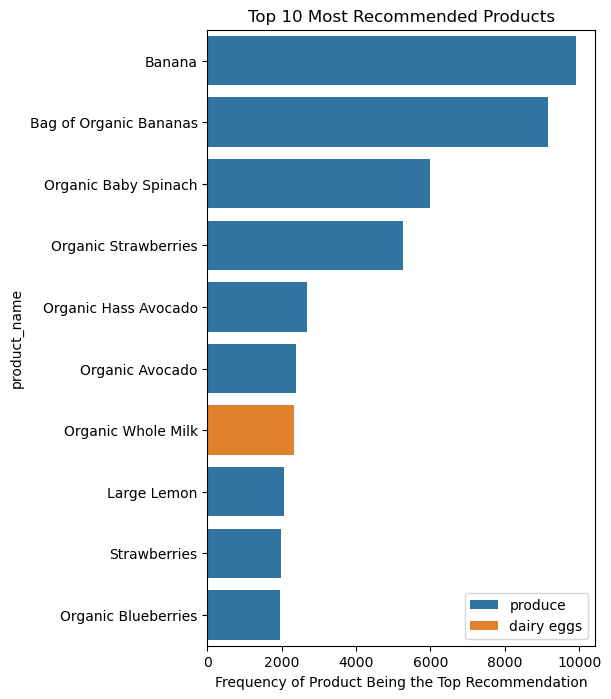

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,8))
ax = sns.barplot(data = product_count[:10], x='count', y = 'product_name', hue = 'department', orient = 'h',dodge=False)
ax.set(xlabel='Frequency of Product Being the Top Recommendation')
plt.title('Top 10 Most Recommended Products')
plt.legend(loc='lower right')
plt.show()

# Item Based Collaborative Filtering

In [ ]:
from scipy.sparse import csr_matrix

user = list(sorted(users_productname_mix_df_train.user_id.unique()))
item = list(sorted(users_productname_mix_df_train.product_id.unique()))

data = users_productname_mix_df_train['mix'].tolist()

col = users_productname_mix_df_train.user_id.astype('category').cat.codes
row = users_productname_mix_df_train.product_id.astype('category').cat.codes
users_productname_mix_matrix = csr_matrix((data, (row, col)), shape=(len(item), len(user)))

In [ ]:
user_mapping = pd.concat([users_productname_mix_df_train.user_id, col], axis = 1)
user_mapping.rename(columns = {0: 'index'}, inplace = True)
user_mapping.drop_duplicates(inplace = True)
user_mapping.set_index('index', inplace = True)

In [ ]:
item_mapping = pd.concat([users_productname_mix_df_train.product_id, row], axis = 1)
item_mapping.rename(columns = {0: 'index'}, inplace = True)
item_mapping.drop_duplicates(inplace = True)
item_mapping.set_index('index', inplace = True)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import pickle

n_neighbours = 10
num_items = users_productname_mix_matrix.shape[0]
similar_items = []
similarity_score = []
item_lst = []
index_lst = []

for i in tqdm(range(num_items)):
    if item_mapping.loc[i, 'product_id'] not in item_lst:
        similarity = cosine_similarity(users_productname_mix_matrix[i:i+1], users_productname_mix_matrix)[0]
        top_indices = np.argsort(-similarity)[1:n_neighbours+1]
        item_lst.append(item_mapping.loc[i, 'product_id'])
        similar_items.append(item_mapping.loc[top_indices, 'product_id'].values)
        similarity_score.append(similarity[top_indices])
        index_lst.append(top_indices)
        del similarity, top_indices
        if i%3000 == 0:
            with open("similar_items_file_" + str(i), "wb") as similar_items_file:
                pickle.dump(similar_items, similar_items_file)
            with open("similarity_score_file_" + str(i), "wb") as similarity_score_file:
                pickle.dump(similarity_score, similarity_score_file)
            with open("item_lst_file_" + str(i), "wb") as item_lst_file:
                pickle.dump(item_lst, item_lst_file)
            with open("index_lst_file_" + str(i), "wb") as index_lst_file:
                pickle.dump(index_lst, index_lst_file)

100%|██████████| 49677/49677 [41:28<00:00, 19.96it/s]


In [ ]:
import pickle

with open("similar_items_file", "wb") as similar_items_file:
    pickle.dump(similar_items, similar_items_file)
with open("similarity_score_file", "wb") as similarity_score_file:
    pickle.dump(similarity_score, similarity_score_file)
with open("item_lst_file", "wb") as item_lst_file:
    pickle.dump(item_lst, item_lst_file)
with open("index_lst_file", "wb") as index_lst_file:
    pickle.dump(index_lst, index_lst_file)

In [ ]:
import pickle

with open("similar_items_file", "rb") as similar_items_file:
    similar_items = pickle.load(similar_items_file)
with open("similarity_score_file", "rb") as similarity_score_file:
    similarity_score = pickle.load(similarity_score_file)
with open("item_lst_file" , "rb") as item_lst_file:
    item_lst = pickle.load(item_lst_file)
with open("index_lst_file", "rb") as index_lst_file:
    index_lst = pickle.load(index_lst_file)

In [ ]:
from tqdm import tqdm

results = pd.DataFrame(columns = ['user_id', 'product_id', 'prediction'])

for j in tqdm(len(index_lst))):
    if (sum(similarity_score[j]) != 0) & (item_lst[j] not in results['product_id'].values):
        avg = pd.DataFrame(np.average(users_productname_mix_matrix[index_lst[j]].todense(), weights = similarity_score[j], axis = 0).transpose())
        avg.rename(columns={0:'prediction'}, inplace = True)
        user_pred = user_mapping.join(avg[avg['prediction'] != 0], how = 'inner')
        pred = pd.concat([pd.DataFrame(np.repeat(item_lst[j], user_pred.shape[0]), index = user_pred.index), user_pred], axis = 1).rename(columns ={0:'product_id'})
        results = pd.concat([results, pred[['user_id', 'product_id', 'prediction']]], axis = 0, ignore_index = True)
        if j % 3000 == 0:
            results.to_csv('colab_filter_item_based_rmse_' + str(j) + '.csv', index = False)
        del avg, user_pred

100%|██████████| 4697/4697 [2:20:42<00:00,  1.80s/it]


In [ ]:
results.to_csv('colab_filter_item_based_rmse.csv', index = False)

## Assess Performance on Test Dataset

In [ ]:
results_item_based = pd.read_csv('colab_filter_item_based_rmse.csv')

In [ ]:
results_item_based.head()

,user_id,product_id,prediction
0,145243,1,0.000515
1,24530,1,0.000111
2,3722,1,0.001397
3,31186,1,0.000115
4,47685,1,0.000368


In [ ]:
combined_test = users_productname_mix_df_test.set_index(['user_id', 'product_id']).join(results_item_based.set_index(['user_id', 'product_id']), how = 'left', on = ['user_id', 'product_id'])
combined_test.fillna(0, inplace = True)

In [ ]:
combined_test.head()

,,product,mix,cluster_kmeans,prediction
user_id,product_id,,,,
95381,7559,Cinnamon Rolls with Icing,0.019324,3,0.003436
24247,39408,Gala Apples,0.006024,12,0.010270
122376,27323,Pure & Natural Sour Cream,0.007299,3,0.000000
131293,10369,Organic Genoa Salami,0.009524,13,0.000000
117798,1700,White Cheddar Popcorn,0.010638,0,0.000000


In [ ]:
import math

rmse_user_based = math.sqrt(sum((combined_test['mix'] - combined_test['prediction'])**2)/combined_test.shape[0])
print('rmse:', rmse_user_based)

rmse: 0.02650661045830266


## Interpreting Model Results

In [ ]:
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')
product_dept = products.join(departments.set_index('department_id'), on= 'department_id')

In [ ]:
combined_all = results_item_based.set_index(['user_id', 'product_id']).join(users_productname_mix_df.set_index(['user_id', 'product_id']), how = 'left', on = ['user_id', 'product_id'])

In [ ]:
combined_all = combined_all[combined_all['mix'].isnull()][['prediction']]
combined_all.reset_index(drop = False, inplace = True)
combined_all['rank'] = combined_all.groupby("user_id")["prediction"].rank(method="dense", ascending=False)

In [ ]:
top_prediction = combined_all[combined_all['rank'] <= 1]
top_prediction = top_prediction.set_index('product_id').join(product_dept.set_index('product_id'), how = 'inner')
top_prediction.reset_index(drop = False, inplace = True)

In [ ]:
product_count = top_prediction[['product_id', 'product_name', 'department', 'user_id']].groupby(['product_id', 'product_name', 'department']).count().rename(columns = {'user_id': 'count'})
product_count.reset_index(drop = False, inplace = True)
product_count = product_count.sort_values('count', ascending = False)

In [ ]:
product_count.head()

,product_id,product_name,department,count
7700,28204,Organic Fuji Apple,produce,7423
9815,35951,Organic Unsweetened Almond Milk,dairy eggs,2631
12302,45066,Honeycrisp Apple,produce,2436
11975,43961,Organic Peeled Whole Baby Carrots,produce,1805
2424,9076,Blueberries,frozen,1777


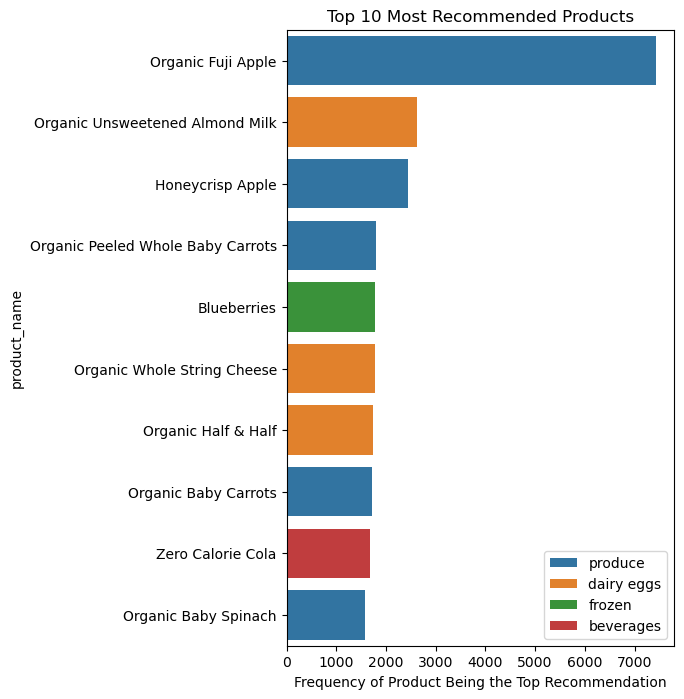

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,8))
ax = sns.barplot(data = product_count[:10], x='count', y = 'product_name', hue = 'department', orient = 'h',dodge=False)
ax.set(xlabel='Frequency of Product Being the Top Recommendation')
plt.title('Top 10 Most Recommended Products')
plt.legend(loc='lower right')
plt.show()

# SVD

In [ ]:
! pip install scikit-surprise

In [ ]:
from surprise import Dataset, Reader

reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(users_productname_mix_df_train[["user_id", "product_id", "mix"]], reader)

## Grid Search to find the best combination of parameters

In [ ]:
from surprise.model_selection import GridSearchCV
from surprise import SVD

param_grid = {"n_factors": [10, 50, 100, 200, 500], "n_epochs": [10, 20, 30], "lr_all": [0.005, 0.01], "reg_all": [0.001, 0.005]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.02639821511493637
{'n_factors': 10, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.005}


In [ ]:
import pickle

with open("gridsearch_file", "wb") as gridsearch_file:
    pickle.dump(gs, gridsearch_file)

with open("param_grid_file", "wb") as param_grid_file:
    pickle.dump(param_grid, param_grid_file)

## Assess Performance on Test Dataset

In [ ]:
test_data = Dataset.load_from_df(users_productname_mix_df_test[["user_id", "product_id", "mix"]], reader)

In [ ]:
from surprise import SVD

svd_rec = SVD(n_factors = 10, n_epochs = 30, lr_all = 0.005, reg_all = 0.005)
svd_rec.fit(data.build_full_trainset())

In [ ]:
predictions = svd_rec.test(test_data.build_full_trainset().build_testset())

In [ ]:
from surprise import accuracy
accuracy.rmse(predictions, verbose=True)

RMSE: 0.0270


0.027030610201550946

## Interpreting Model Results

In [ ]:
import pickle

with open("svd_model", "rb") as svd_model:
    svd_rec = pickle.load(svd_model)

In [ ]:
pred_data = combined_all
pred_data.drop(['prediction', 'rank'], axis = 1, inplace = True)
pred_data[['dummy']] = 0

In [ ]:
n = 500000  #chunk row size
pred_data_chunk = [pred_data[i:i+n] for i in range(0,pred_data.shape[0],n)]

In [ ]:
from tqdm import tqdm
from surprise import Dataset, Reader
reader = Reader(rating_scale=(0, 1))

results_svd = pd.DataFrame(columns = ['uid', 'iid', 'est'])
for i in tqdm(pred_data_chunk):
    pred_dataset = Dataset.load_from_df(i, reader)
    predictions = svd_rec.test(pred_dataset.build_full_trainset().build_testset())
    results_svd = pd.concat([results_svd, pd.DataFrame(predictions)[['uid', 'iid', 'est']]])
    del predictions, pred_dataset

100%|██████████████████████████████████████████████████████████████████████████████| 285/285 [2:10:01<00:00, 27.37s/it]


In [ ]:
results_svd.to_csv('svd_results.csv', index = False)

In [ ]:
results_svd = pd.read_csv('svd_results.csv')
results_svd.rename(columns={'uid': 'user_id', 'iid': 'product_id', 'est': 'prediction'}, inplace = True)

In [ ]:
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')
product_dept = products.join(departments.set_index('department_id'), on= 'department_id')

In [ ]:
n = 500000  #chunk row size
chunk_data = [results_svd[i:i+n] for i in range(0,results_svd.shape[0],n)]

In [ ]:
from tqdm import tqdm

users_productname_mix_df = users_productname_mix_df.set_index(['user_id', 'product_id'])
combined_all = pd.DataFrame(columns = {'user_id', 'product_id', 'prediction'})
for i in tqdm(chunk_data):
    combined_data = i.set_index(['user_id', 'product_id']).join(users_productname_mix_df, how = 'left', on = ['user_id', 'product_id'])
    combined_data = combined_data[combined_data['mix'].isnull()][['prediction']]
    combined_data.reset_index(drop = False, inplace = True)
    combined_all = pd.concat([combined_all, combined_data])
    del combined_data

100%|████████████████████████████████████████████████████████████████████████████████| 285/285 [51:00<00:00, 10.74s/it]


In [ ]:
combined_all.to_csv('results_svd_filter.csv', index = False)

In [ ]:
combined_all['rank'] = combined_all.groupby("user_id")["prediction"].rank(method="dense", ascending=False)

In [ ]:
combined_all.to_csv('results_svd_filter_rank.csv', index = False)

In [ ]:
combined_all = pd.read_csv('results_svd_filter_rank.csv')

In [ ]:
top_prediction = combined_all[combined_all['rank'] <= 1]
top_prediction = top_prediction.set_index('product_id').join(product_dept.set_index('product_id'), how = 'inner')
top_prediction.reset_index(drop = False, inplace = True)

In [ ]:
top_prediction.head()

,product_id,prediction,user_id,rank,product_name,aisle_id,department_id,department
0,17,0.129821,76506,1.0,Rendered Duck Fat,35,12,meat seafood
1,29,0.124381,192241,1.0,Fresh Cut Golden Sweet No Salt Added Whole Ker...,81,15,canned goods
2,42,0.099601,71305,1.0,Biotin 1000 mcg,47,11,personal care
3,52,0.144522,69455,1.0,Mirabelle Brut Rose,134,5,alcohol
4,55,0.155536,90683,1.0,Lasting Color Shampoo,22,11,personal care


In [ ]:
product_count = top_prediction[['product_id', 'product_name', 'department', 'user_id']].groupby(['product_id', 'product_name', 'department']).count().rename(columns = {'user_id': 'count'})
product_count.reset_index(drop = False, inplace = True)
product_count = product_count.sort_values('count', ascending = False)

In [ ]:
product_count.head()

,product_id,product_name,department,count
2769,19660,Spring Water,beverages,67661
1892,13176,Bag of Organic Bananas,produce,64033
7049,49235,Organic Half & Half,dairy eggs,15195
3022,21386,Smartwater,beverages,13013
21,196,Soda,beverages,8172


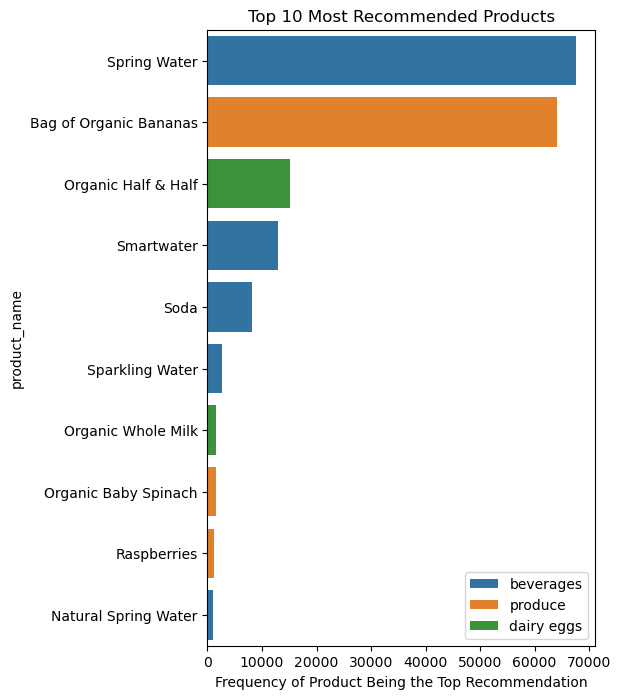

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,8))
ax = sns.barplot(data = product_count[:10], x='count', y = 'product_name', hue = 'department', orient = 'h',dodge=False)
ax.set(xlabel='Frequency of Product Being the Top Recommendation')
plt.title('Top 10 Most Recommended Products')
plt.legend(loc='lower right')
plt.show()